# Building Models
## Objectives
- Learn how models work
- Build a model on a real dataset

## [10] Discussion Exercise to Review ML Concepts
Suppose we are trying to predict whether or not a given tissue sample is cancerous or not.

- What type of machine learning is this?
- What is our target?
- What are some potential features?

# [20] Learn the k-Nearest Neighbors Algorithm

k-Nearest Neighbors is a simple algorithm that helps us illustrate how a model works and what parameters can be tuned.

Let's work together through the following work sheets.


### kNN Worksheet 1

![kNN_Worksheet_1](kNN_sheet_1.png)

### Questions
1. What	is	the	nearest	point to the question mark? This is also called	the	1-nearest neighbor.	
2. What are the 2 nearest neighbors to the question mark? Based  on that, how should we classify the question mark?
3. What about 3 nearest neighbors?
4. How about the 5 nearest neighbors?
5. What	do you notice happening as k increases?

### kNN Worksheet 2

![kNN_Worksheet_2](kNN_sheet_2.png)

### Questions
1. What would a 1-nearest-neighbors classifier output?
2. What about a 3-nearest neighbors classifier?

## Discussion
1. Any thoughts about this model?
2. Any drawbacks that you see or benefits?

**Notes:** Let's talk about model explainability vs. blackbox.

# [30] Let's build a kNN model using `scikit-learn`
Let's walk through the following machine learning workflow together.

**First, let's orient ourselves to scikit-learn**

## https://scikit-learn.org/stable/

In [1]:
import pandas as pd
df = pd.read_csv("https://s3-us-west-2.amazonaws.com/ga-dat-2015-suneel/datasets/breast-cancer.csv", header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Exploratory Data Analysis (EDA)

In [4]:
df.describe()

,0,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
# df.dtypes

## Let's go through the ML Workflow
1. Separate into feature and target
2. Separate those into training and validation sets
3. Train the model using the training data
4. Test the model on the validation data

**1. Separate into feature and target.**

In [8]:
y = df[1]

In [9]:
y.head()

0    M
1    M
2    M
3    M
4    M
Name: 1, dtype: object

Let's hone in on the feature data -> Set X = feature data

In [10]:
X = df[df.columns[2:]]

In [14]:
# df[df.columns[2:]]

In [16]:
X.head()

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**2. Separate into training and validation sets**

## Exercise
Use `train_test_split` to separarate `y` and `X` into training and test (a.k.a. validation) sets.

In [20]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)

In [23]:
len(X_train)

381

In [25]:
len(X_test)

188

In [26]:
len(y_train)

381

**3. Let's train the model on the training data**

In [27]:
from sklearn.neighbors import KNeighborsClassifier
cancer_predictor = KNeighborsClassifier(n_neighbors=5)
cancer_predictor.fit(X_train, y_train)

KNeighborsClassifier()

**Let's make a prediction**

In [28]:
y_test.head(10)

408    M
536    M
486    B
421    B
177    M
109    B
191    B
222    B
110    B
56     M
Name: 1, dtype: object

In [29]:
cancer_predictor.predict(X_test.head(10))

array(['M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M'], dtype=object)

**4. Let's score the model**

In [32]:
cancer_predictor.score(X_test, y_test)

0.9202127659574468

# [30] Mini-Lab: Model Tuning
Let's learn how to tune kNN to see if/how we can improve the performance of our model.

**Try building a model for different values of `n_neighbors` from 3 to 101 and save the accuracies in a list**

HINT: Use for loops

In [46]:
accuracies = []
k_choices = range(3, 102)

for n in k_choices:
    cancer_predictor = KNeighborsClassifier(n_neighbors=n)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)
    cancer_predictor.fit(X_train, y_train)
    accuracies.append(cancer_predictor.score(X_test, y_test))

In [38]:
# accuracies

**Then, we'll graph n_neighbors vs score to see which value is best for this data set**

In [39]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [47]:
acc_df = pd.DataFrame({"k": k_choices, "accuracy": accuracies})

<AxesSubplot:xlabel='k'>

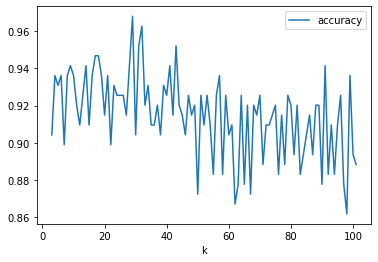

In [48]:
acc_df.plot(kind='line', x='k', y='accuracy')

In [45]:
len(df)

569